In [ ]:
#here we load the mnist dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

4


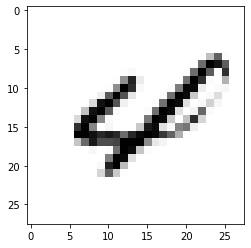

In [ ]:
import matplotlib.pyplot as plt
image_index=531
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap = 'Greys')

In [ ]:
#reshapping and preprocessing
#reshapping array to 4-dimensions so that it can work with keras API
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
#making sure values are float so that we can get decimals after normalization
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')
#normalizing rgb codes by dividing it with max rgb value
x_train/=255
x_test/=255
print('x_train shape',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
#building keras 
#importing required keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#creating sequential model and adding layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer
model.add(Flatten())
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
#compiling and fitting the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2754 - accuracy: 0.9166
Epoch 2/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0965 - accuracy: 0.9701
Epoch 3/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0760 - accuracy: 0.9773
Epoch 4/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0633 - accuracy: 0.9803
Epoch 5/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0535 - accuracy: 0.9830
Epoch 6/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0490 - accuracy: 0.9844
Epoch 7/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0436 - accuracy: 0.9859
Epoch 8/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0403 - accuracy: 0.9872
Epoch 9/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0372 - accuracy: 0.9879
Epoch 10/20
1875/1875 [==============================] - 30s 16m

In [ ]:
#evaluating
model.evaluate(x_text,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0444 - accuracy: 0.9882


[0.04444302245974541, 0.9882000088691711]

4


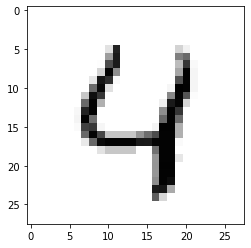

In [ ]:
#testing data
image_index=4
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())

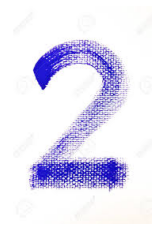

In [ ]:
#previewing the downloaded image
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Load image as greyscale
im=cv2.imread('images.jpg')
# Show image
plt.imshow(im, cmap="gray"), plt.axis("off")
plt.show()

In [ ]:
im.shape

(276, 183, 3)

In [ ]:
from tensorflow.keras.preprocessing import image #Import Keras image processor

In [ ]:
#load downloaded image and resze to target size
img = image.load_img("images.jpg", target_size=(28, 28),color_mode="grayscale")

In [ ]:
#convert loaded and resized image to array of numbers
img_array = image.img_to_array(img)

In [ ]:
#Confirm new shape
img_array.shape

(28, 28, 1)

In [ ]:
#Convert image array to 2D format that can be predicted upon
img_array = img_array[:,:,0]
img_array.shape

(28, 28)

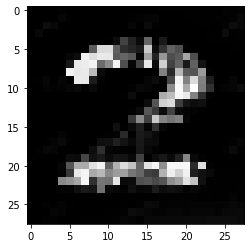

In [ ]:
plt.imshow(img_array,cmap="Greys")

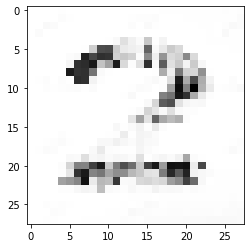

In [ ]:
#invert loaded image array into same format as data used for training
img_array=1-img_array
plt.imshow(img_array,cmap="Greys")

2


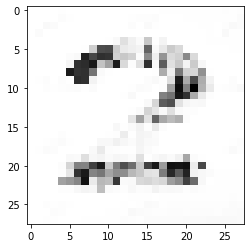

In [ ]:
#Running Prediction on the image

plt.imshow(img_array,cmap="Greys")
pred = model.predict(img_array.reshape(1, 28, 28, 1))
print(pred.argmax())
